# **Linear and Logistic Regression**
Author: Dayne N. Fradejas 
---



# **Problem 1: Energy Efficiency in Buildings**

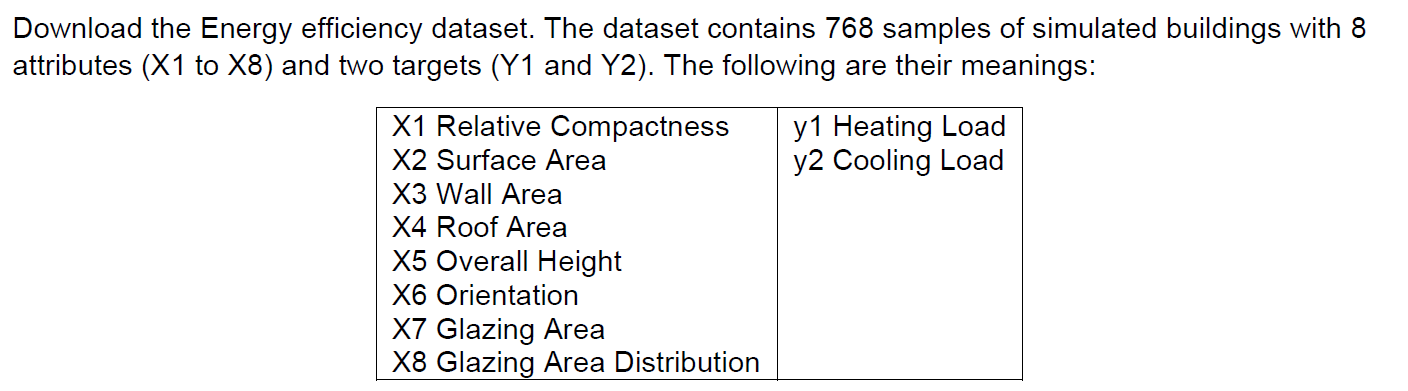

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data.head(30)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


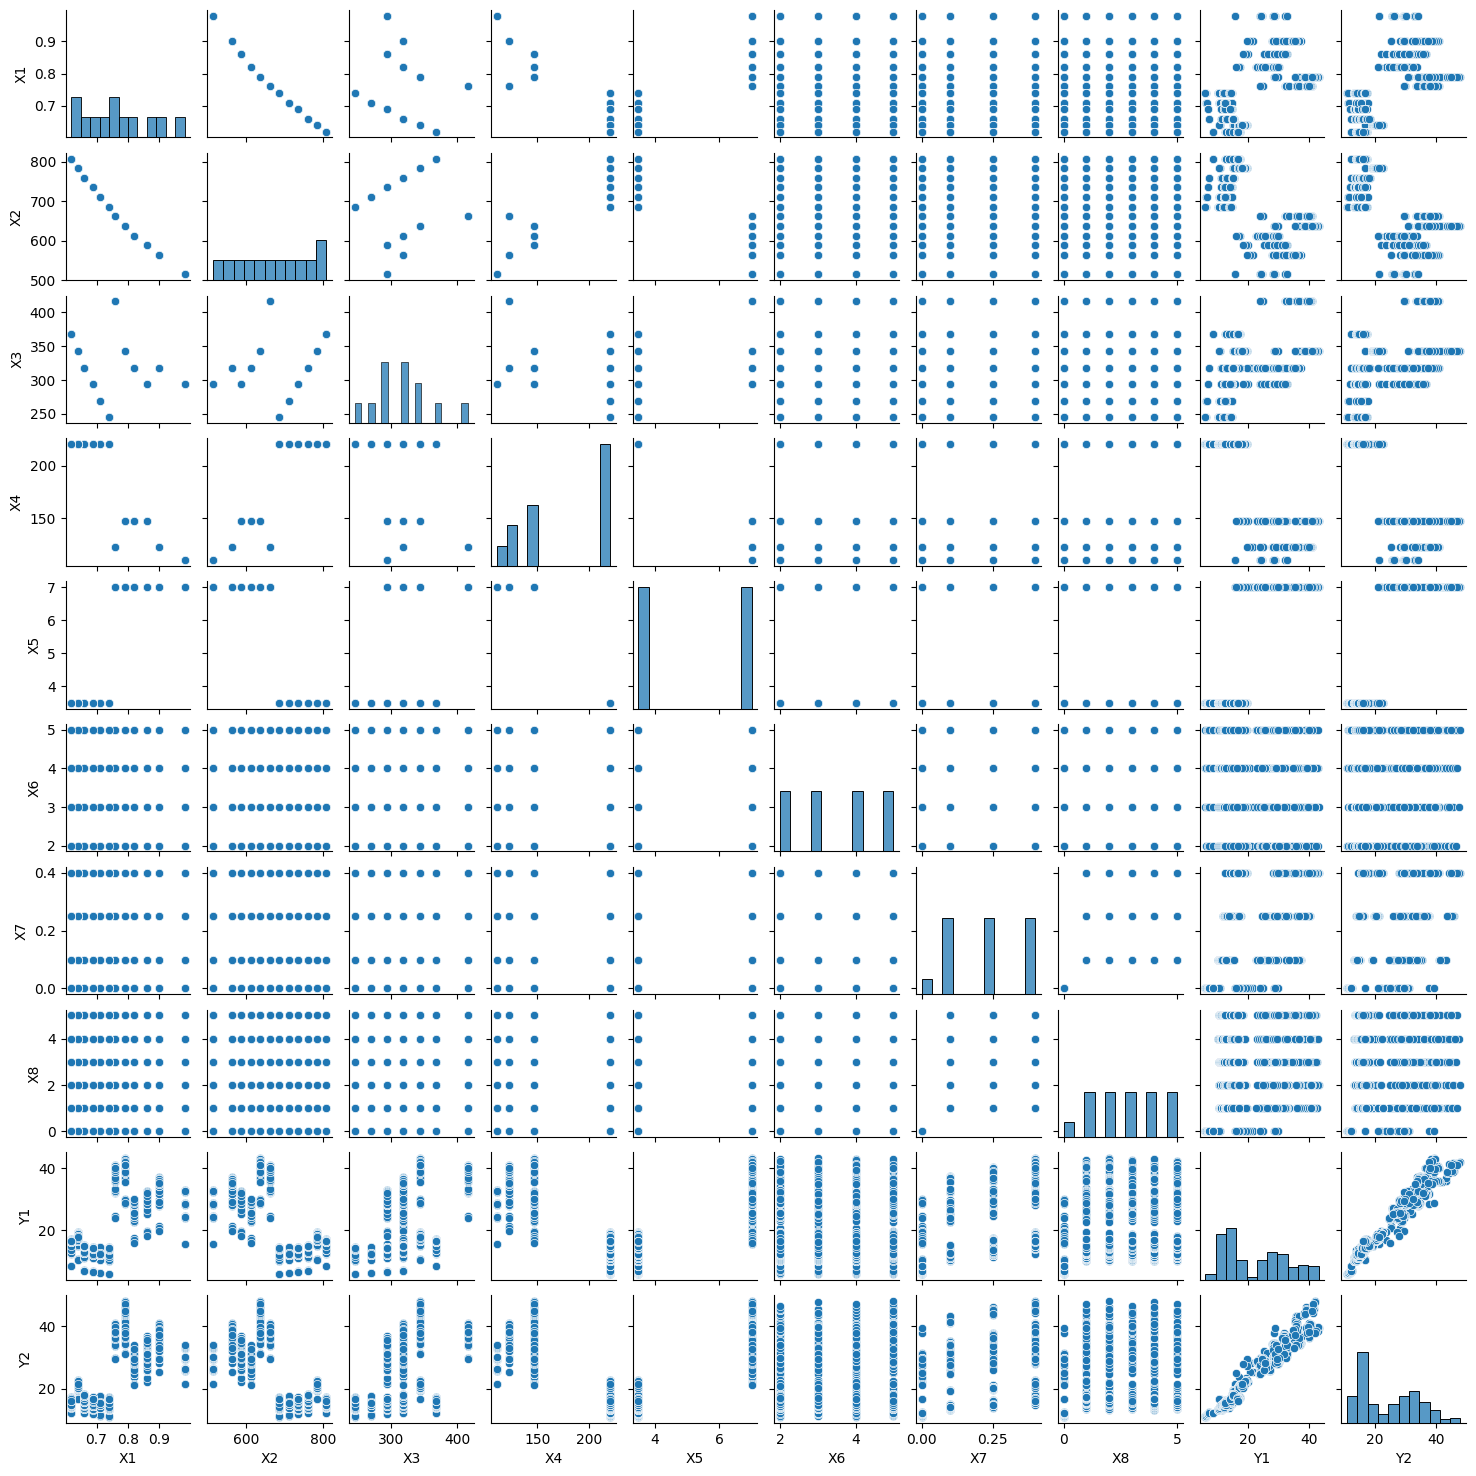

In [ ]:
sns.pairplot(data, height=1.5)
plt.show()

Y1 & Y2 has a direct relationship from one another

In [ ]:
# Split the samples into 60% Training, 20% Validation, and 20% Testing data at random

# Predicting Y1
x_y1, y_y1 = data.iloc[:,:-2].to_numpy(), data.iloc[:,-2].to_numpy()

X_train, X_2, y_train, y_2 = train_test_split(x_y1, y_y1, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.00001, 0.0001, 0.001, 0.01,0.1, 1, 5, 10, 20, 50]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 8)
(154, 8)
(154, 8)
Alpha: 0.0
	Coefficients: [-5.93614634e+00  5.81553167e+13 -2.92034636e+13 -5.96607741e+13
  7.48496082e+00 -2.62333923e-01  2.52600414e+00  2.32310126e-01]
	Intercept: 22.369842248948018
	Training accuracy (R2): 0.923907406650448
	Validation accuracy (R2): 0.9081315625235968
Alpha: 1e-05
	Coefficients: [-5.93612904 -3.18684581  0.8275049  -3.5114874   7.53152253 -0.09785029
  2.52232847  0.27825526]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9241944814133665
	Validation accuracy (R2): 0.9089153164967685
Alpha: 0.0001
	Coefficients: [-5.93597326 -3.18674237  0.82753286 -3.51139995  7.53155799 -0.09785088
  2.52232788  0.27825495]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9241944814103904
	Validation accuracy (R2): 0.9089152699229721
Alpha: 0.001
	Coefficients: [-5.93441613 -3.18570705  0.82781165 -3.5105272   7.53191234 -0.0978567
  2.52232199  0.27825186]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9241944811129945
	

Best alpha: 1e-05
Coefficients: [-5.93612904 -3.18684581  0.8275049  -3.5114874   7.53152253 -0.09785029
  2.52232847  0.27825526]
Intercept: 22.31525217391302
Testing accuracy (R2) of Best Model: 0.8948220325652442


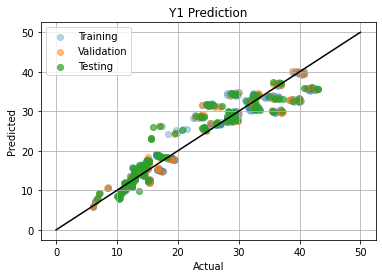

In [ ]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.title("Y1 Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

`Features X1, x2, x4, x5, x7 are the best features. `

In [ ]:
# Split the samples into 60% Training, 20% Validation, and 20% Testing data at random

# Predicting Y2
x_y2, y_y2 = data.iloc[:,:-2].to_numpy(), data.iloc[:,-1].to_numpy()

X_train, X_2, y_train, y_2 = train_test_split(x_y2, y_y2, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.00001, 0.0001, 0.001, 0.01,0.1, 1, 5, 10, 20]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 8)
(154, 8)
(154, 8)
Alpha: 0.0
	Coefficients: [-6.76351463e+00 -1.01747964e+14  5.10940895e+13  1.04381897e+14
  7.97705296e+00  4.30753630e-01  1.84537644e+00  1.06901534e-01]
	Intercept: 24.55901148683484
	Training accuracy (R2): 0.886256791959843
	Validation accuracy (R2): 0.8812564185263224
Alpha: 1e-05
	Coefficients: [-6.76349522 -3.44211212  0.11995937 -3.41397449  7.8956004   0.14297452
  1.8518072   0.02651629]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.8874268785560979
	Validation accuracy (R2): 0.8821647600277985
Alpha: 0.0001
	Coefficients: [-6.76332049 -3.44199593  0.11999079 -3.41387644  7.89564035  0.1429738
  1.85180672  0.02651596]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.8874268785519824
	Validation accuracy (R2): 0.8821647594290509
Alpha: 0.001
	Coefficients: [-6.76157394 -3.4408338   0.12030449 -3.41289717  7.89603962  0.14296665
  1.85180196  0.02651267]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.8874268781407273
	V

Best alpha: 1e-05
Coefficients: [-6.76349522 -3.44211212  0.11995937 -3.41397449  7.8956004   0.14297452
  1.8518072   0.02651629]
Intercept: 24.65452173913041
Testing accuracy (R2) of Best Model: 0.890536591077684


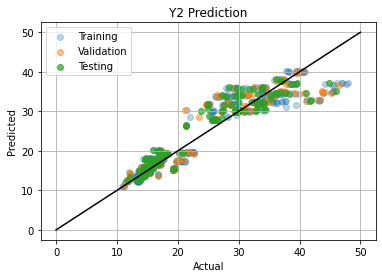

In [ ]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.title("Y2 Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

## Training the Top 5 Features


```
Features x1, x2, x4, x5, x7 are the best features (largest absolute value of the coefficients).
```



In [ ]:
# Drop unecessary columns
dt = data.copy()
dt = dt.drop(dt.columns[[2, 5, 7]],axis = 1)

In [ ]:
# Split the samples into 60% Training, 20% Validation, and 20% Testing data at random

# Predicting Y1
x_y1, y_y1 = dt.iloc[:,:-2].to_numpy(), dt.iloc[:,-2].to_numpy()
X_train, X_2, y_train, y_2 = train_test_split(x_y1, y_y1, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.00001, 0.0001, 0.001, 0.01,0.1, 1, 5, 10, 20, 50]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 5)
(154, 5)
(154, 5)
Alpha: 0.0
	Coefficients: [-5.92205762 -1.5424623  -5.19467645  7.51968579  2.58322712]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9233865965103447
	Validation accuracy (R2): 0.9080566433453336
Alpha: 1e-05
	Coefficients: [-5.92204305 -1.54244769 -5.19467293  7.51968951  2.58322705]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9233865965103236
	Validation accuracy (R2): 0.9080566388060156
Alpha: 0.0001
	Coefficients: [-5.92191186 -1.54231619 -5.19464122  7.51972298  2.5832264 ]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9233865965082322
	Validation accuracy (R2): 0.9080565979503721
Alpha: 0.001
	Coefficients: [-5.92060062 -1.54100181 -5.19432438  7.52005739  2.58321987]
	Intercept: 22.31525217391302
	Training accuracy (R2): 0.9233865962992597
	Validation accuracy (R2): 0.908056189217718
Alpha: 0.01
	Coefficients: [-5.90755118 -1.5279236  -5.19117604  7.52337784  2.58315468]
	Intercept: 22.31525217391302
	Training accura

Best alpha: 0.0
Coefficients: [-5.92205762 -1.5424623  -5.19467645  7.51968579  2.58322712]
Intercept: 22.31525217391302
Testing accuracy (R2) of Best Model: 0.8936465451491458


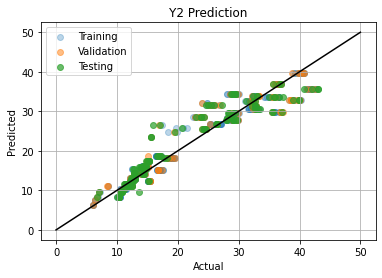

In [ ]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.title("Y2 Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Split the samples into 60% Training, 20% Validation, and 20% Testing data at random

# Predicting Y2
x_y2, y_y2 = dt.iloc[:,:-2].to_numpy(), dt.iloc[:,-1].to_numpy()

X_train, X_2, y_train, y_2 = train_test_split(x_y2, y_y2, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.00001, 0.0001, 0.001, 0.01,0.1, 1, 5, 10, 20]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 5)
(154, 5)
(154, 5)
Alpha: 0.0
	Coefficients: [-6.71001429 -3.15206706 -3.67112037  7.8869292   1.86598576]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.887201465317088
	Validation accuracy (R2): 0.8823286910784309
Alpha: 1e-05
	Coefficients: [-6.70999552 -3.1520479  -3.67111663  7.88693355  1.86598569]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.8872014653170491
	Validation accuracy (R2): 0.8823286900934411
Alpha: 0.0001
	Coefficients: [-6.7098266  -3.15187547 -3.67108297  7.88697268  1.86598511]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.8872014653132047
	Validation accuracy (R2): 0.8823286812242116
Alpha: 0.001
	Coefficients: [-6.70813822 -3.150152   -3.67074659  7.88736369  1.86597925]
	Intercept: 24.65452173913041
	Training accuracy (R2): 0.8872014649290643
	Validation accuracy (R2): 0.8823285921044977
Alpha: 0.01
	Coefficients: [-6.69133542 -3.1330018  -3.66740822  7.8912437   1.8659209 ]
	Intercept: 24.65452173913041
	Training accura

Best alpha: 0.0
Coefficients: [-6.71001429 -3.15206706 -3.67112037  7.8869292   1.86598576]
Intercept: 24.65452173913041
Testing accuracy (R2) of Best Model: 0.8899853756003409


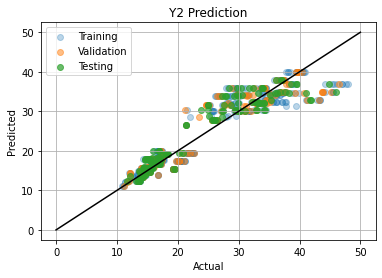

In [ ]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.title("Y2 Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

## **Based on your results for this Problem, what insights did you gain?**

* In problem 1a, the values with the best results falls with the *Ridge Regression* that has the alpha value of `0.00001`. In the result, values with alpha between 0 and 1 garnered the largest accuracy and when the value `alpha > 1`, the test accuracy diminishes. 

* In problem 2a, when the top 5 features is retained from the training data set, the test accuracy was not drastically affected and the data points from the graph becomes much closer. 

* When the top 5 feautures is used, the Ridge Regression with the *smallest alpha* has the best accuracy of the results.

# **Problem 2: Classifying Breast Tumors**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Cleaning

In [ ]:
import pandas as pd

breast_cancer = []
data_bc = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

# data preparation
for _, row in data_bc.iterrows():
  breast_cancer.append(row[0].split(","))

# covert data to dataframe
df_bc = pd.DataFrame(breast_cancer, columns =['id', 'ct', 'uc_size', 'uc_shape','ma','secs','bn', 'bc','nn','mit','class'],
                                           dtype = object) 

# clean data with empty cells and cells with "?" and replace it with NaN
df_bc = df_bc.replace(r'^s*$', float('NaN'), regex = True)
df_bc = df_bc.replace("?", float('NaN'))

# drop rows with NaN values
df_bc = df_bc.dropna()

# map values of class from 2 --> 0 (Benign) ; 4 --> 1 (malignant)
_class = {"2" : 0,
          "4" : 1}

df_bc["class"] = df_bc["class"].map(_class)

# convert data type of values
df_bc = df_bc.astype(int)
         

In [ ]:
df_bc.describe()

,id,ct,uc_size,uc_shape,ma,secs,bn,bc,nn,mit,class
count,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1.075639e+06,4.313636,2.937879,2.992424,2.625758,3.080303,3.366667,3.283333,2.693939,1.489394,0.328788
std,6.297063e+05,2.757822,2.866915,2.765757,2.643330,2.041580,3.532908,2.294685,2.882151,1.495022,0.470129
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.730490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171262e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238466e+06,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Pipeline creation

In [ ]:
#drop ID for training
df_bc = df_bc.iloc[: , 1:]

# Split the samples into 70% Training, 30% testing at random
x, y = df_bc.iloc[:,:-1].to_numpy(), df_bc.iloc[:,-1].to_numpy()

# split data set
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

print(X_train.shape)
print(X_test.shape)

model = make_pipeline(StandardScaler(),LogisticRegression(penalty=None)).fit(X_train,y_train)
train_R2 = model.score(X_train,y_train)
test_R2 = model.score(X_test,y_test)

print(f"Coefficients: {mdl[1].coef_}")
print(f"Training accuracy (R2): {train_R2}")
print(f"Testing accuracy (R2): {test_R2}")


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

## Confusion Matrix

## Training Set

accuracy = 0.9696969696969697
Coefficients:  [-1.29431674] [[2.16797958 0.70950962 0.51823522 1.02313589 1.35666278 0.30620328
  0.91989841]]


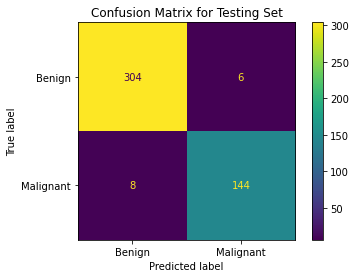

In [ ]:
# Confusion Matrix
y_train_pred = model.predict(X_train)
print(f"accuracy = {model.score(X_train,y_train)}")
print(f"Coefficients: ", model[1].intercept_, model[1].coef_)
cfm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Testing Set')
plt.show()

F1:  0.9536423841059603
Precission:  0.96
Recall:  0.9473684210526315
False Alarm Rate:  0.01935483870967742

AUC:  0.9640067911714769


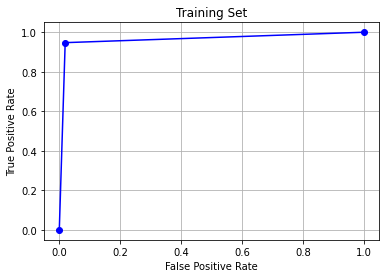

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import metrics


tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()

precission = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*recall*precission)/(recall+precission)
false_alarm_rate = fp / (fp + tn)

print(f"F1: ",f1)
print(f"Precission: ",precission)
print(f"Recall: ",recall)
print(f"False Alarm Rate: ",false_alarm_rate)
print("")

# ROC and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
print(f"AUC: ",metrics.roc_auc_score(y_train, y_train_pred))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Training Set")
plt.grid()
plt.show()

## Testing Set

accuracy = 0.9393939393939394
Coefficients:  [-1.29431674] [[2.16797958 0.70950962 0.51823522 1.02313589 1.35666278 0.30620328
  0.91989841]]


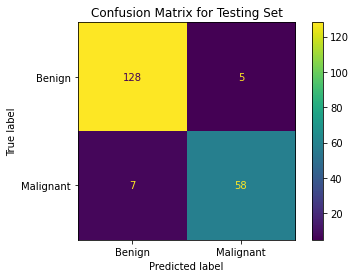

In [ ]:
# Confusion Matrix
y_test_pred = model.predict(X_test)
print(f"accuracy = {model.score(X_test,y_test)}")
print(f"Coefficients: ", model[1].intercept_, model[1].coef_)
cfm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Testing Set')
plt.show()

F1:  0.90625
Precission:  0.9206349206349206
Recall:  0.8923076923076924
False Alarm Rate:  0.03759398496240601

AUC:  0.927356853672643


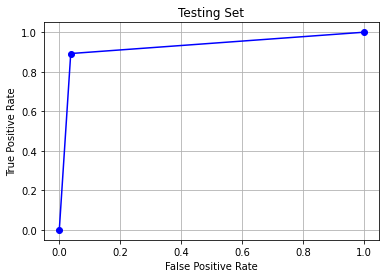

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()

precission = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*recall*precission)/(recall+precission)
false_alarm_rate = fp / (fp + tn)

print(f"F1: ",f1)
print(f"Precission: ",precission)
print(f"Recall: ",recall)
print(f"False Alarm Rate: ",false_alarm_rate)
print("")

# ROC and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
print(f"AUC: ",metrics.roc_auc_score(y_test, y_test_pred))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Testing Set")
plt.grid()
plt.show()

## **Based on your results for this Problem, what insights did you gain?**

* There are different implmentation of logistic regression in the discussion, however, it was made easier when a pipeline is used. 

* The results shows that the training data has higher accuracy in terms of F1, Precission, Recall, False Alarm rate, and AUC. 

* The confusion matrix has really been a good graphical representation of the data. The results shown on the matrix allows the analyst to have a proper judgement in the accuracy of the data more than the computation that has been presented.

* The ROC has also been a good visualization of how accurate the trained model is. As much in the discussion of this graph in the lecture, being able to apply it in the real world problem made me understand more of its use and how it will help in future researches. 

In [3]:
x_bar = (1.9 + 2.4 + 3.0 + 3.5 + 4.2)/5
x_bar

(1/4)*(1.9 - x_bar )

3.0